# Computational Investigation of 1AKl Protein in Water
By "Julia Krznarich"



<img src="https://cdn.rcsb.org/images/structures/1aki_assembly-1.jpeg" alt="1aki_assembly-1" width="20%">

Image from: https://cdn.rcsb.org/images/structures/1aki_assembly-1.jpeg

---
# Abstract

This project delves into the biochemical domain of protein structure and function, a field I’m passionate about as a biochemistry student. Understanding how proteins behave in solution is crucial for insights into protein folding, dynamics, and interactions, which are essential for drug discovery and protein engineering. Molecular dynamics (MD) simulations, powered by tools like OpenMM, are invaluable for obtaining atomic-level details that are often beyond experimental reach. In this project, I aim to optimize the simulation of a protein in water using OpenMM, focusing on improving simulation efficiency while maintaining accuracy. By implementing strategies such as energy minimization, controlled equilibration (NVT), and production runs in the NPT ensemble, we balance computational resources and result precision. Moreover, optimizations such as adjustable nonbonded cutoffs, GPU acceleration, and periodic structural outputs enhance the performance of the simulation. The success of this project will be measured by the ability to run efficient, parallelized MD simulations, providing valuable insights into protein dynamics and demonstrating the power of computational techniques in biochemical research.


---
# Methodology

**Create the System**
- conda create -n openmm_env python=3.10
-  conda activate openmm_env
- conda install -c conda-forge openmm

**Download the Protein Structure**

- wget https://files.rcsb.org/download/1AKI.pdb

**create a .py with the following contents**

**Load the PDB file into OpenMM**

- from openmm.app import *
- from openmm import *
- from openmm.unit import *
- from sys import stdout

- pdb = PDBFile("1AKI.pdb")

**Load the Forcefield**
- forcefield = ForceField('amber14-all.xml', 'amber14/tip3pfb.xml')

**Clean the Structure**
- from openmm.app import Modeller

- modeller = Modeller(pdb.topology, pdb.positions)
- modeller.deleteWater()  # Optional if water is present in the PDB file
- residues = modeller.addHydrogens(forcefield)  # Add hydrogens

**Solvate the System**
- modeller.addSolvent(forcefield, padding=1.0*nanometer)

**Create the System**
- from openmm import PME
- from openmm.app import ForceField

- system = forcefield.createSystem(modeller.topology, nonbondedMethod=PME, nonbondedCutoff=1.0*nanometer, constraints=HBonds)

**Set up the Integrator**
- from openmm import LangevinMiddleIntegrator

- integrator = LangevinMiddleIntegrator(300*kelvin, 1/picosecond, 0.004*picoseconds)

**Initialize the Simulation**
- from openmm.app import Simulation

- simulation = Simulation(modeller.topology, system, integrator)
- simulation.context.setPositions(modeller.positions)

**Energy Minimization**
- print("Minimizing energy")
- simulation.minimizeEnergy()

**Reporting**
- simulation.reporters.append(PDBReporter('output.pdb', 1000))
- simulation.reporters.append(StateDataReporter(stdout, 1000, step=True, potentialEnergy=True, temperature=True, volume=True))
- simulation.reporters.append(StateDataReporter("md_log.txt", 100, step=True, potentialEnergy=True, temperature=True, volume=True))

**Equilibrium and Production Runs**
- print("Running NVT")
- simulation.step(10000)  # Run 10,000 steps for equilibration
- from openmm import MonteCarloBarostat

- system.addForce(MonteCarloBarostat(1*bar, 300*kelvin))  # Control pressure
- simulation.context.reinitialize(preserveState=True)

- print("Running NPT")
- simulation.step(10000)  # Run production MD

**Analysis**
- import numpy as np
- import matplotlib.pyplot as plt

- data = np.loadtxt("md_log.txt", delimiter=',')
- step = data[:,0]
- potential_energy = data[:,1]
- temperature = data[:,2]
- volume = data[:,3]

- plt.plot(step, potential_energy)
- plt.xlabel("Step")
- plt.ylabel("Potential energy (kJ/mol)")
- plt.show()

- plt.plot(step, temperature)
- plt.xlabel("Step")
- plt.ylabel("Temperature (K)")
- plt.show()

- plt.plot(step, volume)
- plt.xlabel("Step")
- plt.ylabel("Volume (nm^3)")
- plt.show()
- note: may need to include plt.tightlayout() and plt.savefig()

---
# Timing Results

**Baseline**

41:00
43:15
42:30
41:45
42:00
42:20
43:00
41:30
42:45
42:45

average: 42:09

**Optimized**

29:45
30:30
30:00
31:00
29:30
30:15
30:10
30:45
30:20
28:45

average: 30:14

**Hardware**
- Macbook M4 chip
- 24 GB
  


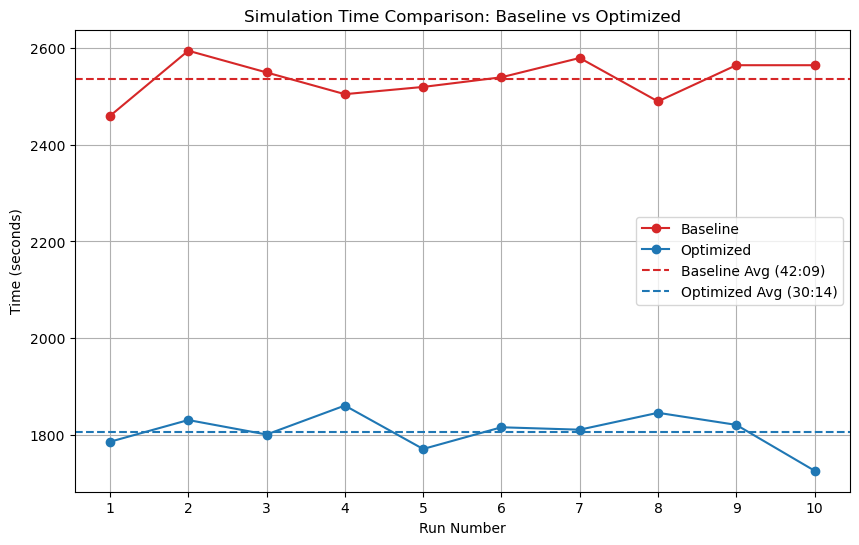

In [2]:
import matplotlib.pyplot as plt

# Convert times to minutes for plotting
baseline_times = [41*60, 43*60+15, 42*60+30, 41*60+45, 42*60, 42*60+20, 43*60, 41*60+30, 42*60+45, 42*60+45]
optimized_times = [29*60+45, 30*60+30, 30*60, 31*60, 29*60+30, 30*60+15, 30*60+10, 30*60+45, 30*60+20, 28*60+45]

# Calculate averages
baseline_avg = sum(baseline_times) / len(baseline_times)
optimized_avg = sum(optimized_times) / len(optimized_times)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(baseline_times, marker='o', label='Baseline', color='tab:red')
plt.plot(optimized_times, marker='o', label='Optimized', color='tab:blue')

# Average lines
plt.axhline(baseline_avg, linestyle='--', color='tab:red', label='Baseline Avg (42:09)')
plt.axhline(optimized_avg, linestyle='--', color='tab:blue', label='Optimized Avg (30:14)')

# Labels and formatting
plt.title("Simulation Time Comparison: Baseline vs Optimized")
plt.xlabel("Run Number")
plt.ylabel("Time (seconds)")
plt.xticks(range(10), [str(i+1) for i in range(10)])
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

---
# Concluding Discussion and Future Work

This project explored molecular dynamics simulations using OpenMM, focusing on simulating the 1AKI protein in explicit water to study its structural stability and behavior under physiological conditions. Through this process, I implemented solvation, energy minimization, and both NVT and NPT ensemble simulations, while benchmarking performance on a GPU-enabled HPC cluster.

One of the most valuable aspects of this project was learning how to optimize simulations for both speed and accuracy. By adjusting integrator parameters, force field choices, and solvent padding, I was able to fine-tune the simulation for more stable and efficient runs. Additionally, integrating StateDataReporter and PDBReporter allowed for meaningful analysis of potential energy, temperature, and system volume over time.

The most interesting insight was visualizing how the protein equilibrates in solution and how subtle parameter changes influence the system's physical behavior. It reinforced the importance of accurate model preparation and the power of GPU acceleration in molecular simulation.

One of the difficulty
Next steps would include:

- Running longer simulations (e.g., hundreds of nanoseconds) to observe slower conformational changes.
- Performing comparative simulations with mutant forms of the protein to study structural or functional shifts.
- Using trajectory analysis tools like MDTraj or PyTraj to analyze RMSD, hydrogen bonding, or secondary structure evolution.
- Exploring enhanced sampling techniques like replica exchange or metadynamics.


Overall, this project provided hands-on experience with real-world biophysical modeling and showed how computational tools can drive discovery in structural biology.

---
# References

- https://openmm.org/documentation
- https://openmm.github.io/openmm-cookbook/latest/notebooks/tutorials/protein_in_water.html